In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(r"C:\Users\lenovo\OneDrive\Desktop\4TH SEMESTER\DAI-101\blinkit_products.csv")
# Inspect the structure
print(df.info())  # Check columns, data types, and missing values
print(df.head())  # View the first few rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_id         268 non-null    int64  
 1   product_name       268 non-null    object 
 2   category           268 non-null    object 
 3   brand              268 non-null    object 
 4   price              268 non-null    float64
 5   mrp                268 non-null    float64
 6   margin_percentage  268 non-null    float64
 7   shelf_life_days    268 non-null    int64  
 8   min_stock_level    268 non-null    int64  
 9   max_stock_level    268 non-null    int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 21.1+ KB
None
   product_id product_name             category                    brand  \
0      153019       Onions  Fruits & Vegetables               Aurora LLC   
1       11422     Potatoes  Fruits & Vegetables           Ramaswamy-Tata   
2      669378     Potat

In [4]:
# Fill missing numerical values with median
df.fillna(df.median(numeric_only=True), inplace=True)

# Fill missing categorical values with mode
df.fillna(df.mode().iloc[0], inplace=True)

print("Missing values handled successfully!")


Missing values handled successfully!


In [6]:
# Remove duplicate rows if any
df.drop_duplicates(inplace=True)

# Confirm duplicate removal
print("Duplicates removed. Total rows left:", df.shape[0])


Duplicates removed. Total rows left: 268


In [10]:
# Detect and treat outliers using IQR (only for numerical columns)
numeric_cols = df.select_dtypes(include=['number']).columns  # Select only numerical columns
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filter out outliers only in numerical columns
df = df[~((df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound)).any(axis=1)]

print("Outliers handled. Total rows left:", df.shape[0])

Outliers handled. Total rows left: 268


In [12]:
# Standardize categorical values
df['product_name'] = df['product_name'].str.strip().str.lower()
df['category'] = df['category'].str.strip().str.lower()
df['brand'] = df['brand'].str.strip().str.lower()

print("Categorical values standardized!")


Categorical values standardized!


In [14]:
#summary statistics
print(df.describe(include='all'))  # Includes numerical & categorical data


           product_id product_name           category      brand       price  \
count      268.000000          268                268        268  268.000000   
unique            NaN           51                 11        267         NaN   
top               NaN   pet treats  dairy & breakfast  jha group         NaN   
freq              NaN           12                 30          2         NaN   
mean    514855.940299          NaN                NaN        NaN  488.356828   
std     291391.529820          NaN                NaN        NaN  298.487200   
min       4452.000000          NaN                NaN        NaN   12.320000   
25%     273697.750000          NaN                NaN        NaN  226.717500   
50%     541459.000000          NaN                NaN        NaN  442.185000   
75%     754334.000000          NaN                NaN        NaN  779.445000   
max     993331.000000          NaN                NaN        NaN  995.980000   

                mrp  margin_percentage 

In [16]:
# Frequency distribution for categorical variables
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())


Value counts for product_name:
product_name
pet treats           12
vitamins             10
dish soap            10
lotion               10
toilet cleaner       10
cough syrup           9
pulses                8
baby wipes            8
detergent             7
potatoes              7
frozen biryani        7
biscuits              7
eggs                  7
bread                 7
orange juice          7
cat food              7
cola                  7
baby food             6
dog food              6
pain reliever         6
onions                6
frozen pizza          5
wheat flour           5
carrots               5
cheese                5
soap                  5
toothpaste            5
popcorn               5
shampoo               5
sugar                 5
curd                  4
butter                4
nuts                  4
chocolates            4
mango drink           4
chips                 4
salt                  3
frozen vegetables     3
tomatoes              3
bananas            

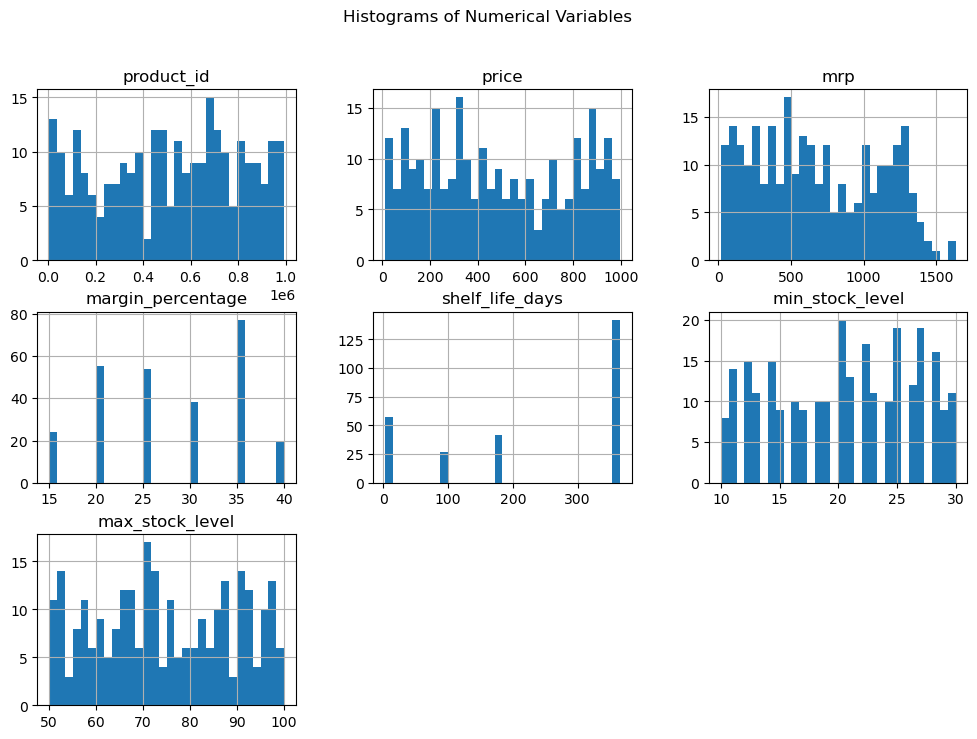

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograms
df.hist(figsize=(12, 8), bins=30)
plt.suptitle("Histograms of Numerical Variables")
plt.show()




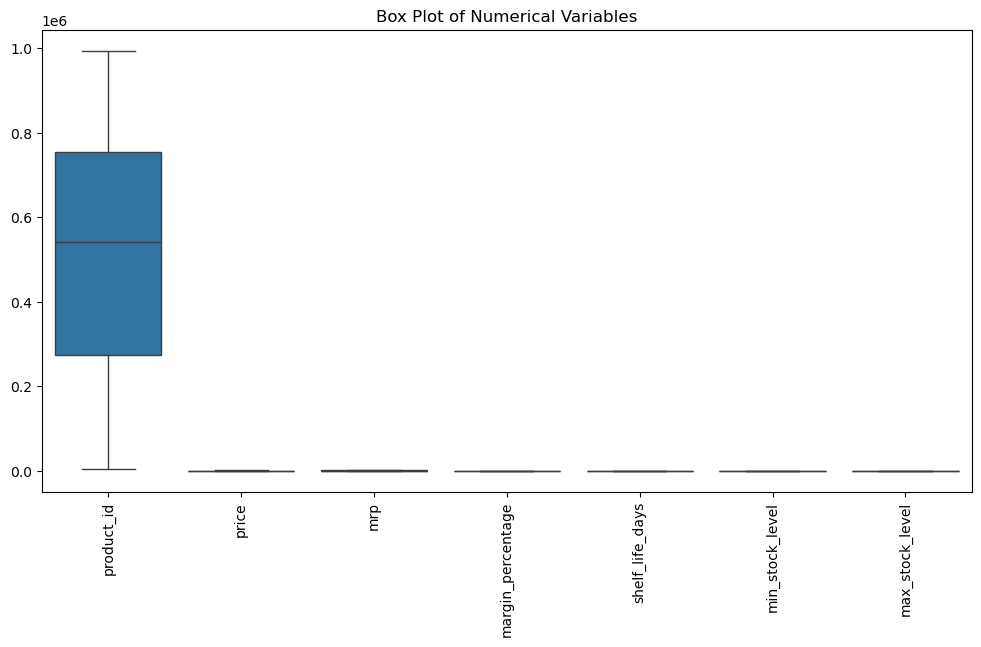

In [20]:
# Box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Box Plot of Numerical Variables")
plt.show()

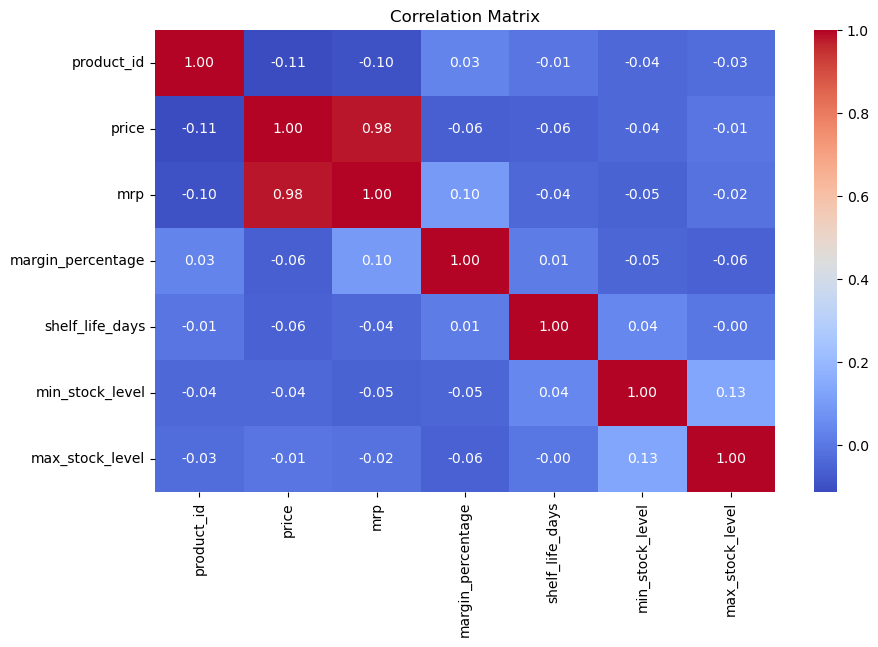

In [22]:
#bivariate analysis
#correlation matrix
import numpy as np

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


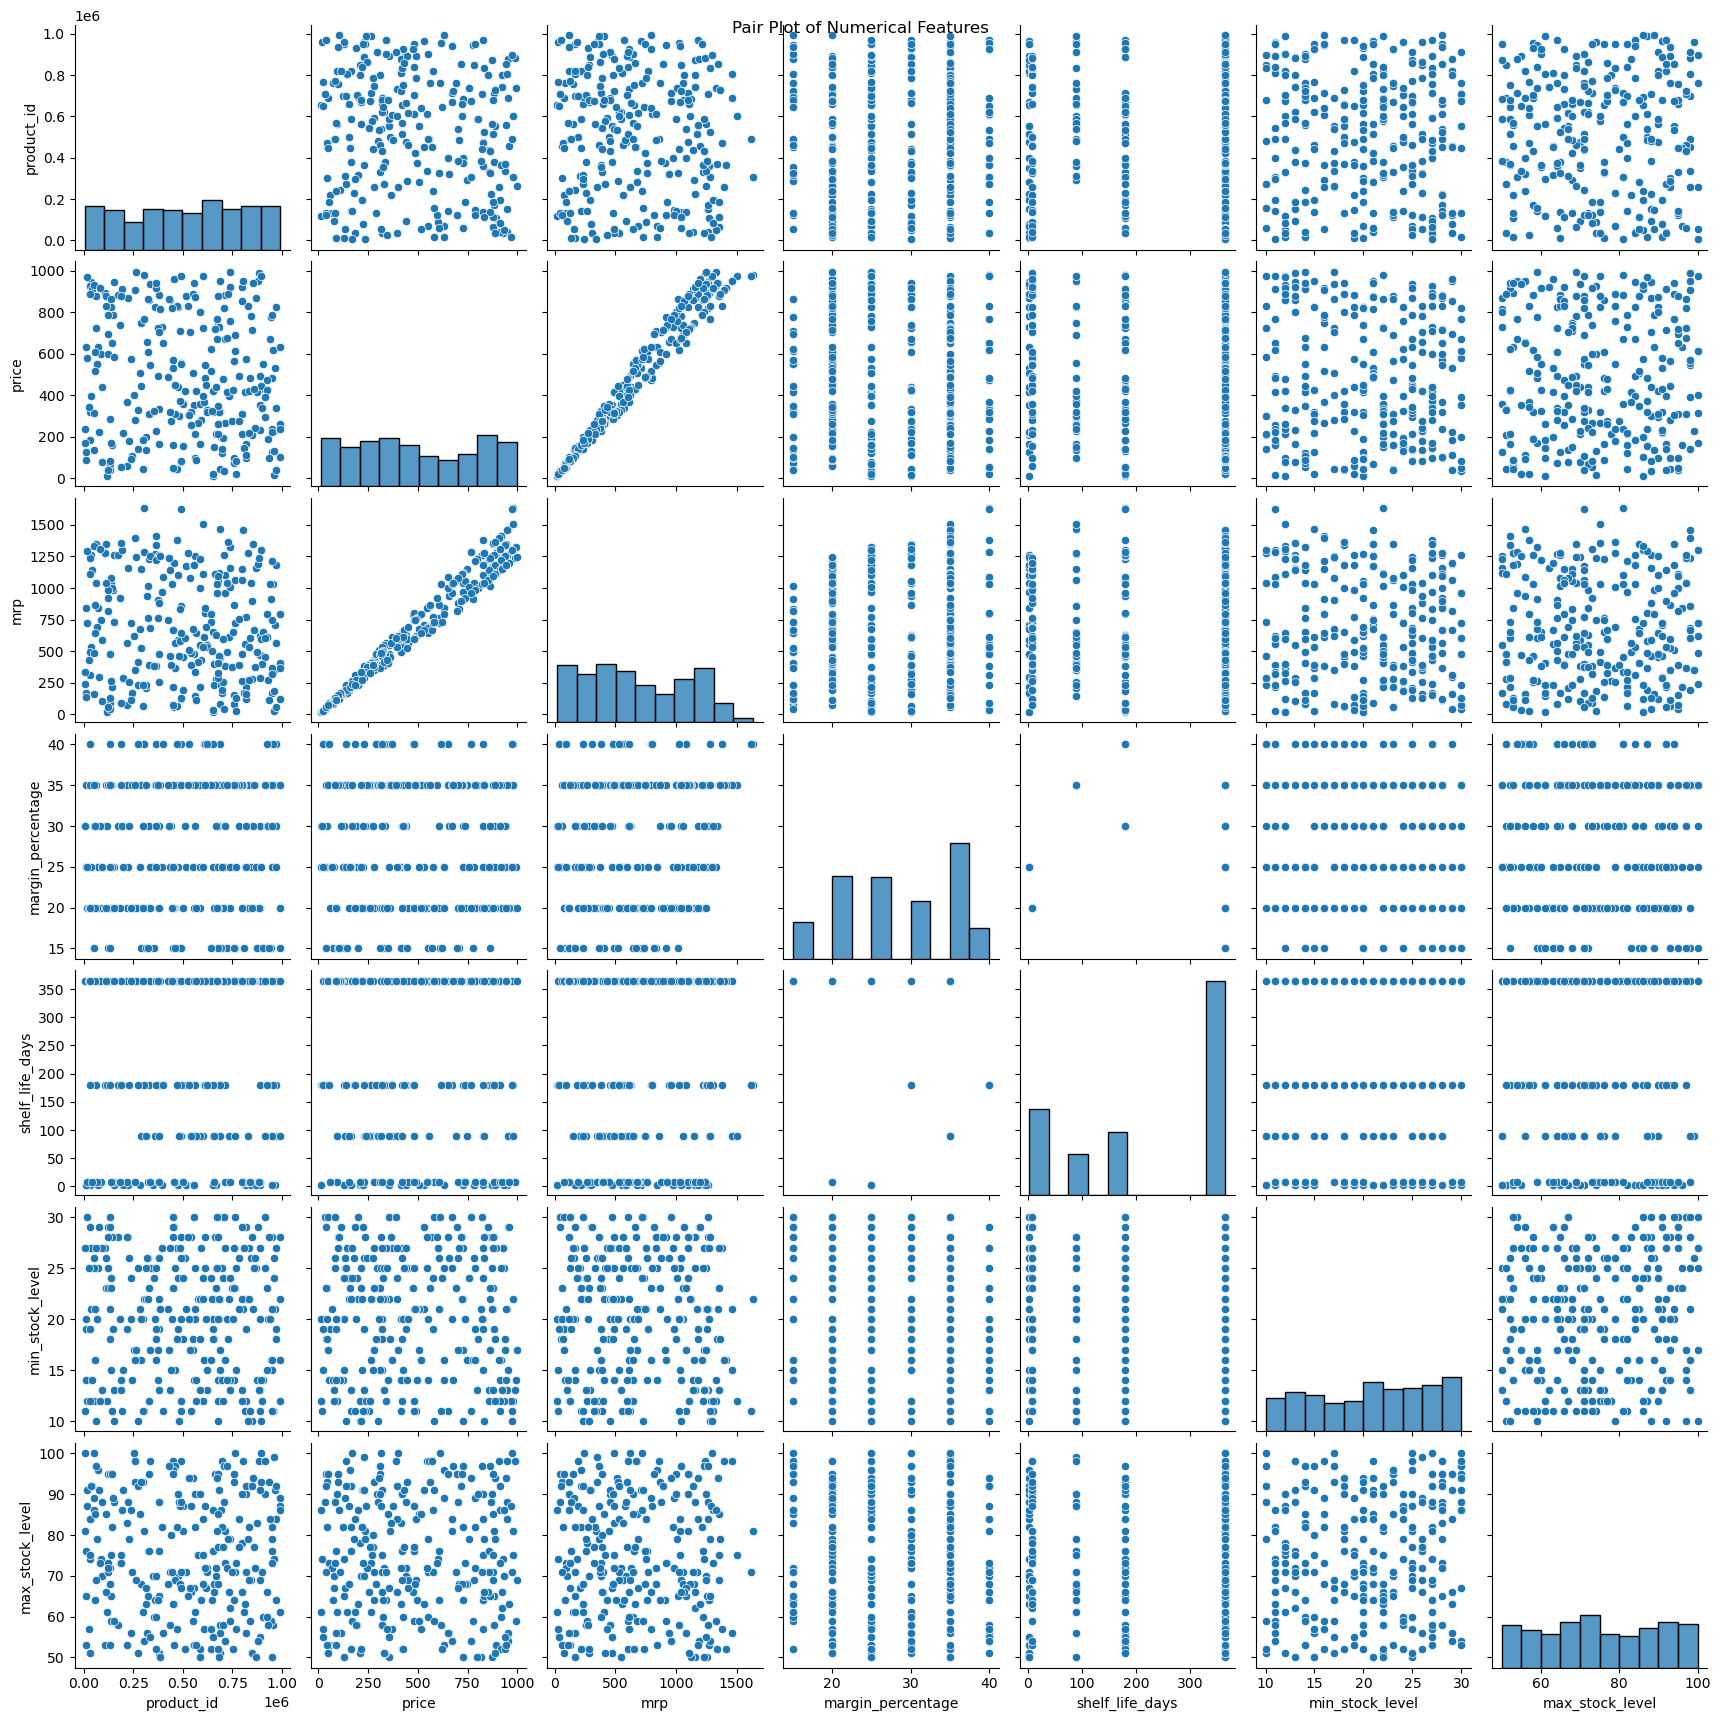

In [25]:
# Scatter plot
sns.pairplot(df.select_dtypes(include=['number']))
plt.suptitle("Pair Plot of Numerical Features")
plt.show()

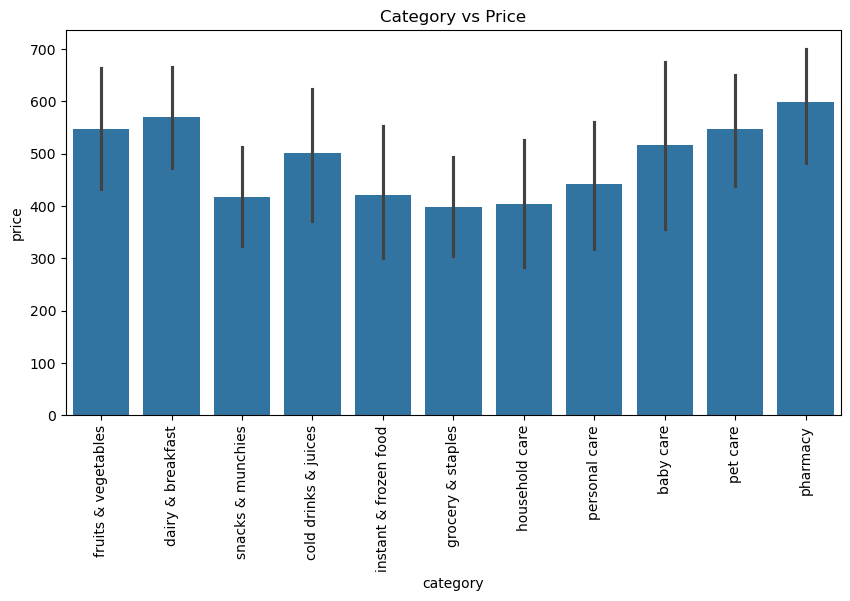

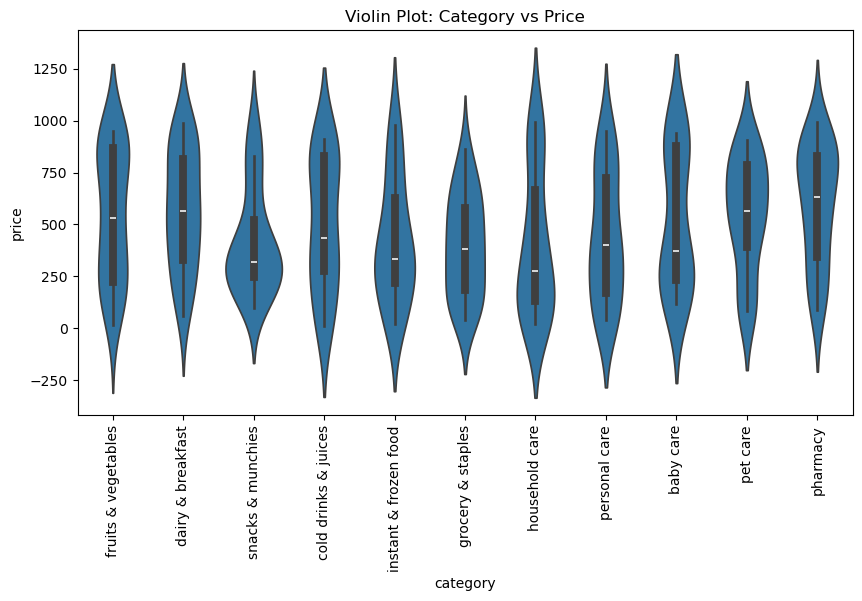

In [27]:
#Bar Plots, Violin Plots & Box Plots
plt.figure(figsize=(10, 5))
sns.barplot(x='category', y='price', data=df)
plt.xticks(rotation=90)
plt.title("Category vs Price")
plt.show()

plt.figure(figsize=(10, 5))
sns.violinplot(x='category', y='price', data=df)
plt.xticks(rotation=90)
plt.title("Violin Plot: Category vs Price")
plt.show()


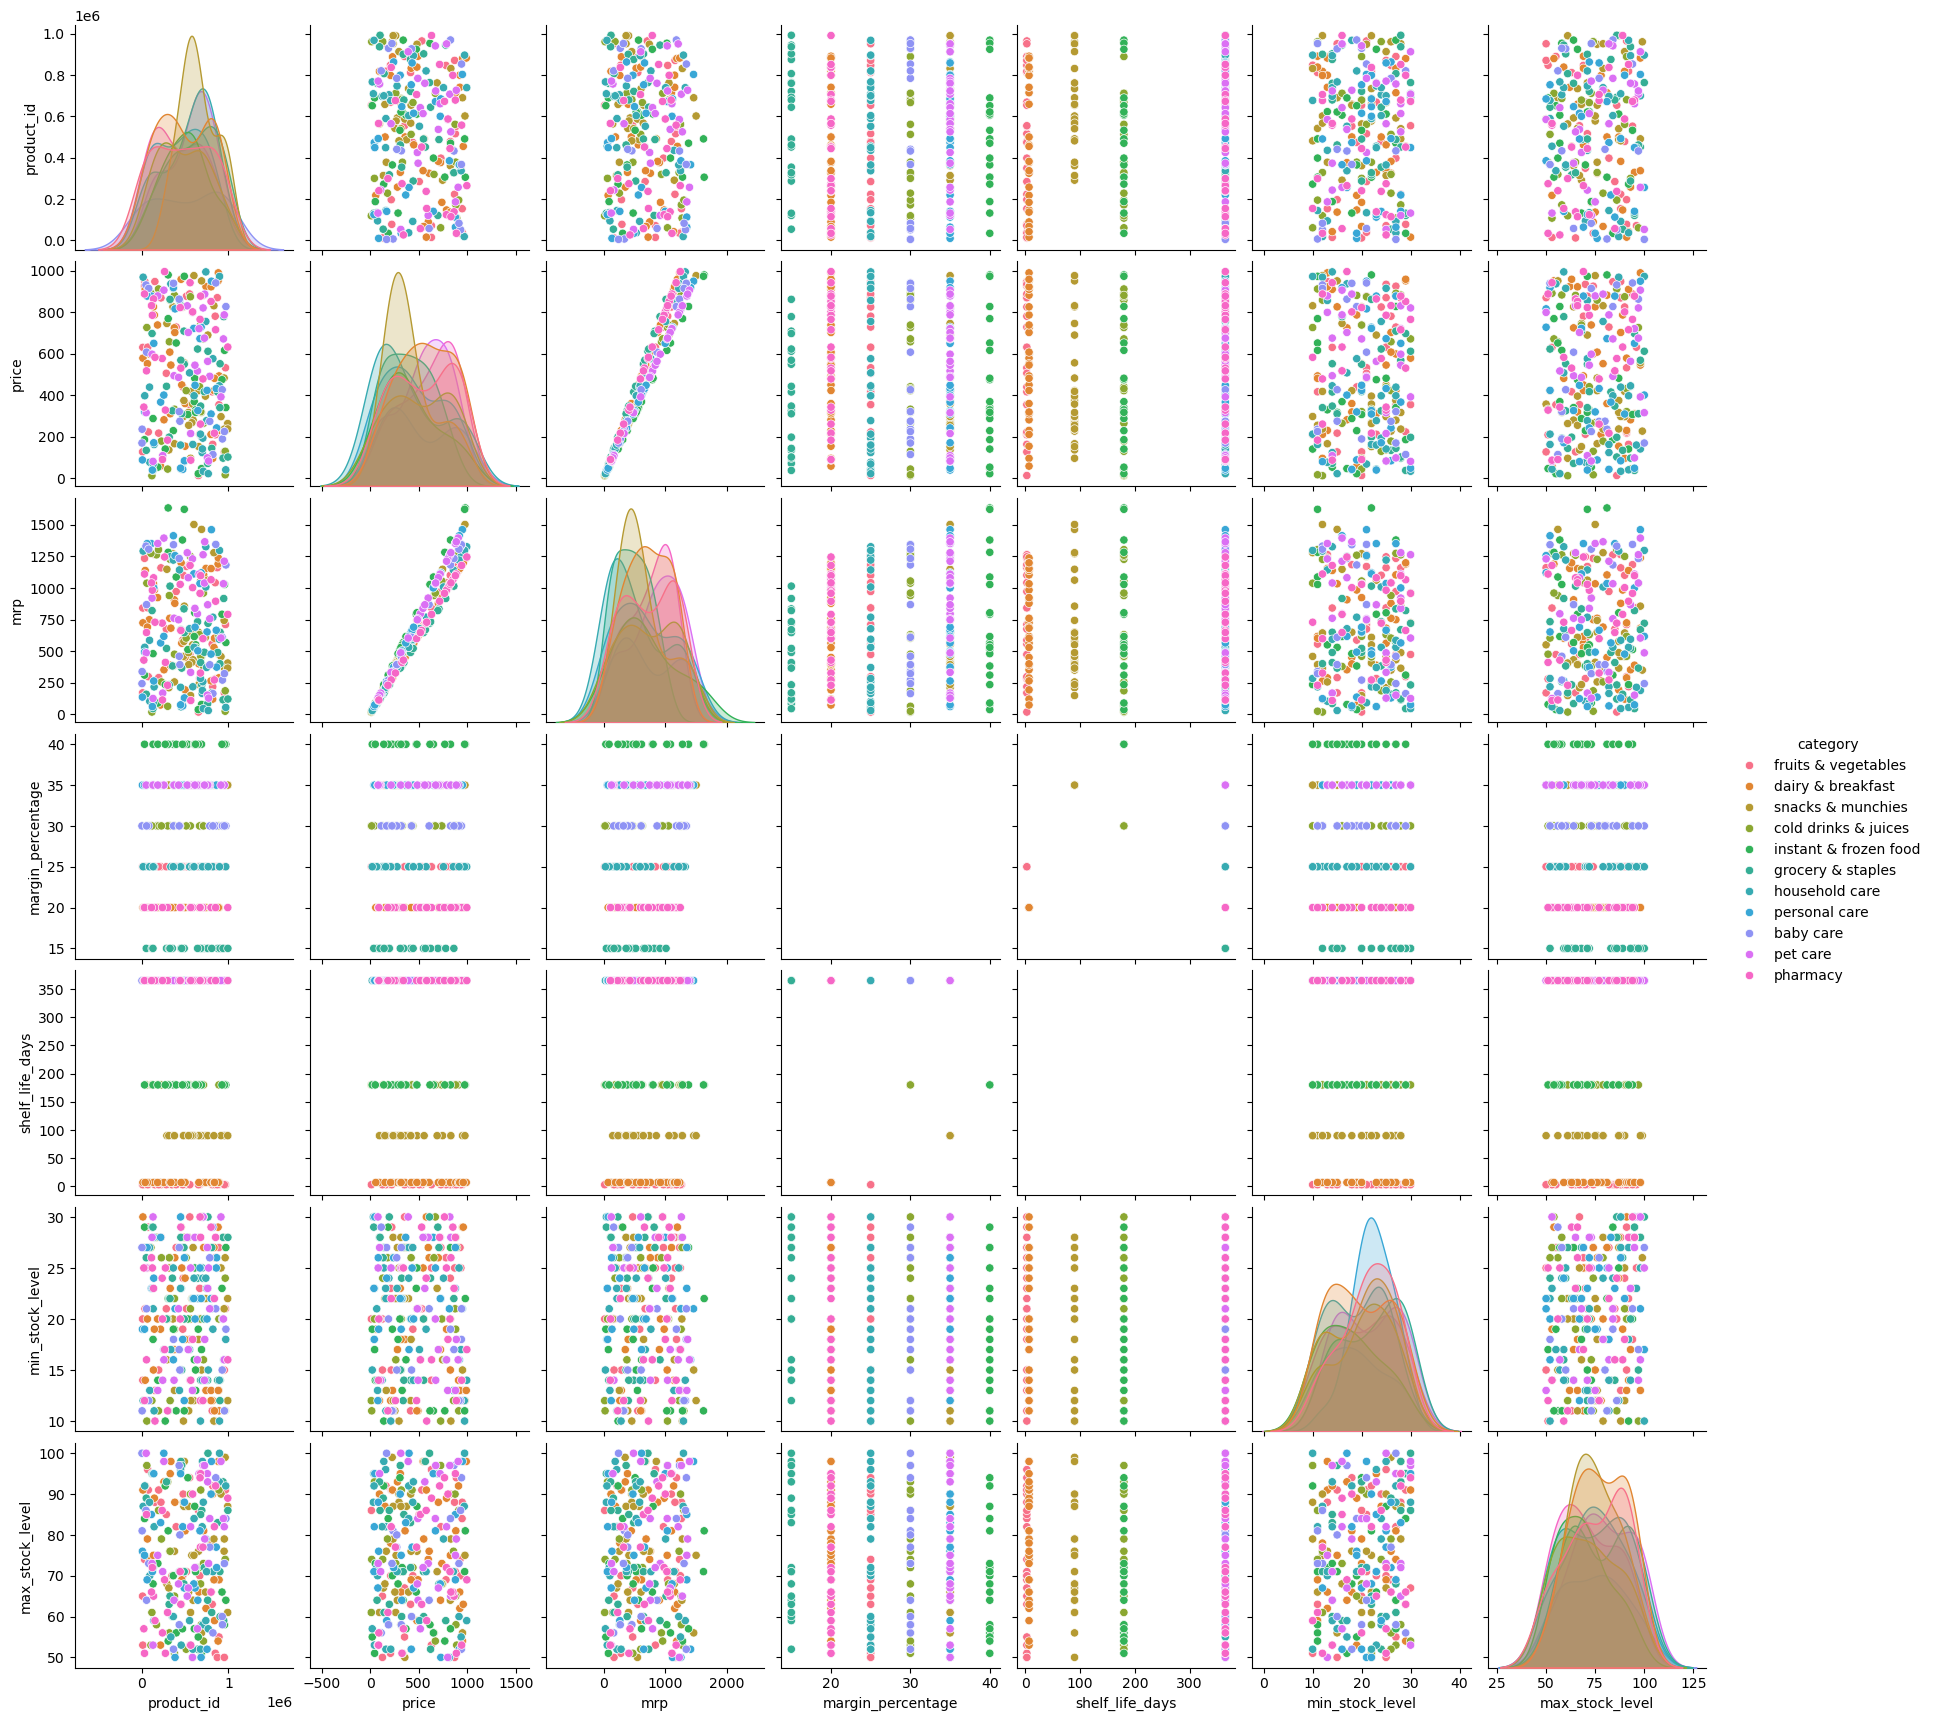

In [30]:
#multivariate analysis
#Pair Plots
sns.pairplot(df, hue='category')
plt.show()


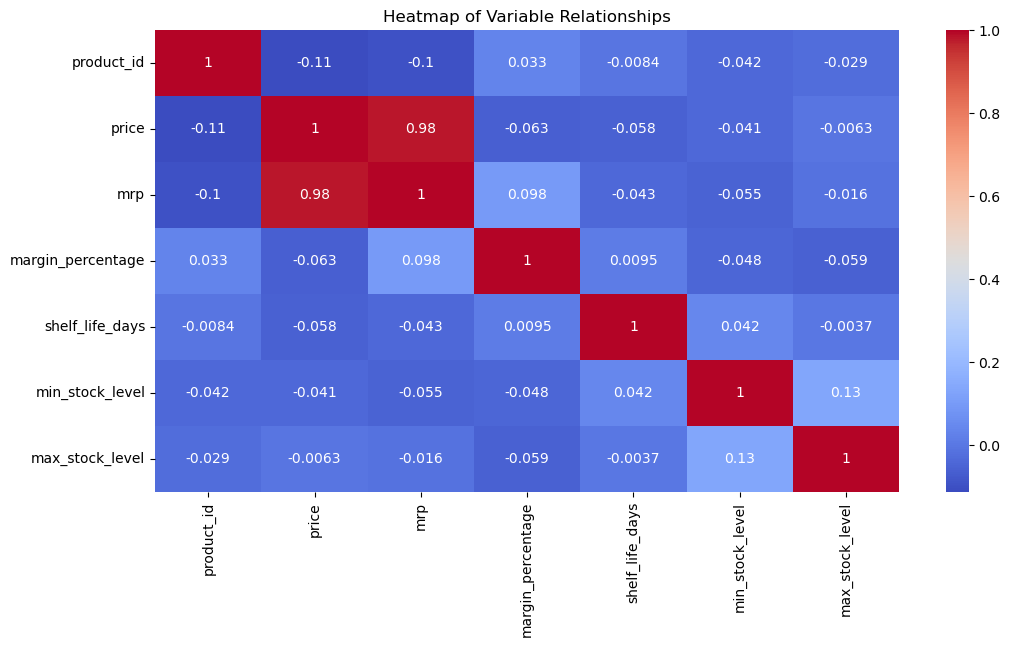

In [31]:
#heatmaps
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", annot=True)
plt.title("Heatmap of Variable Relationships")
plt.show()


C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


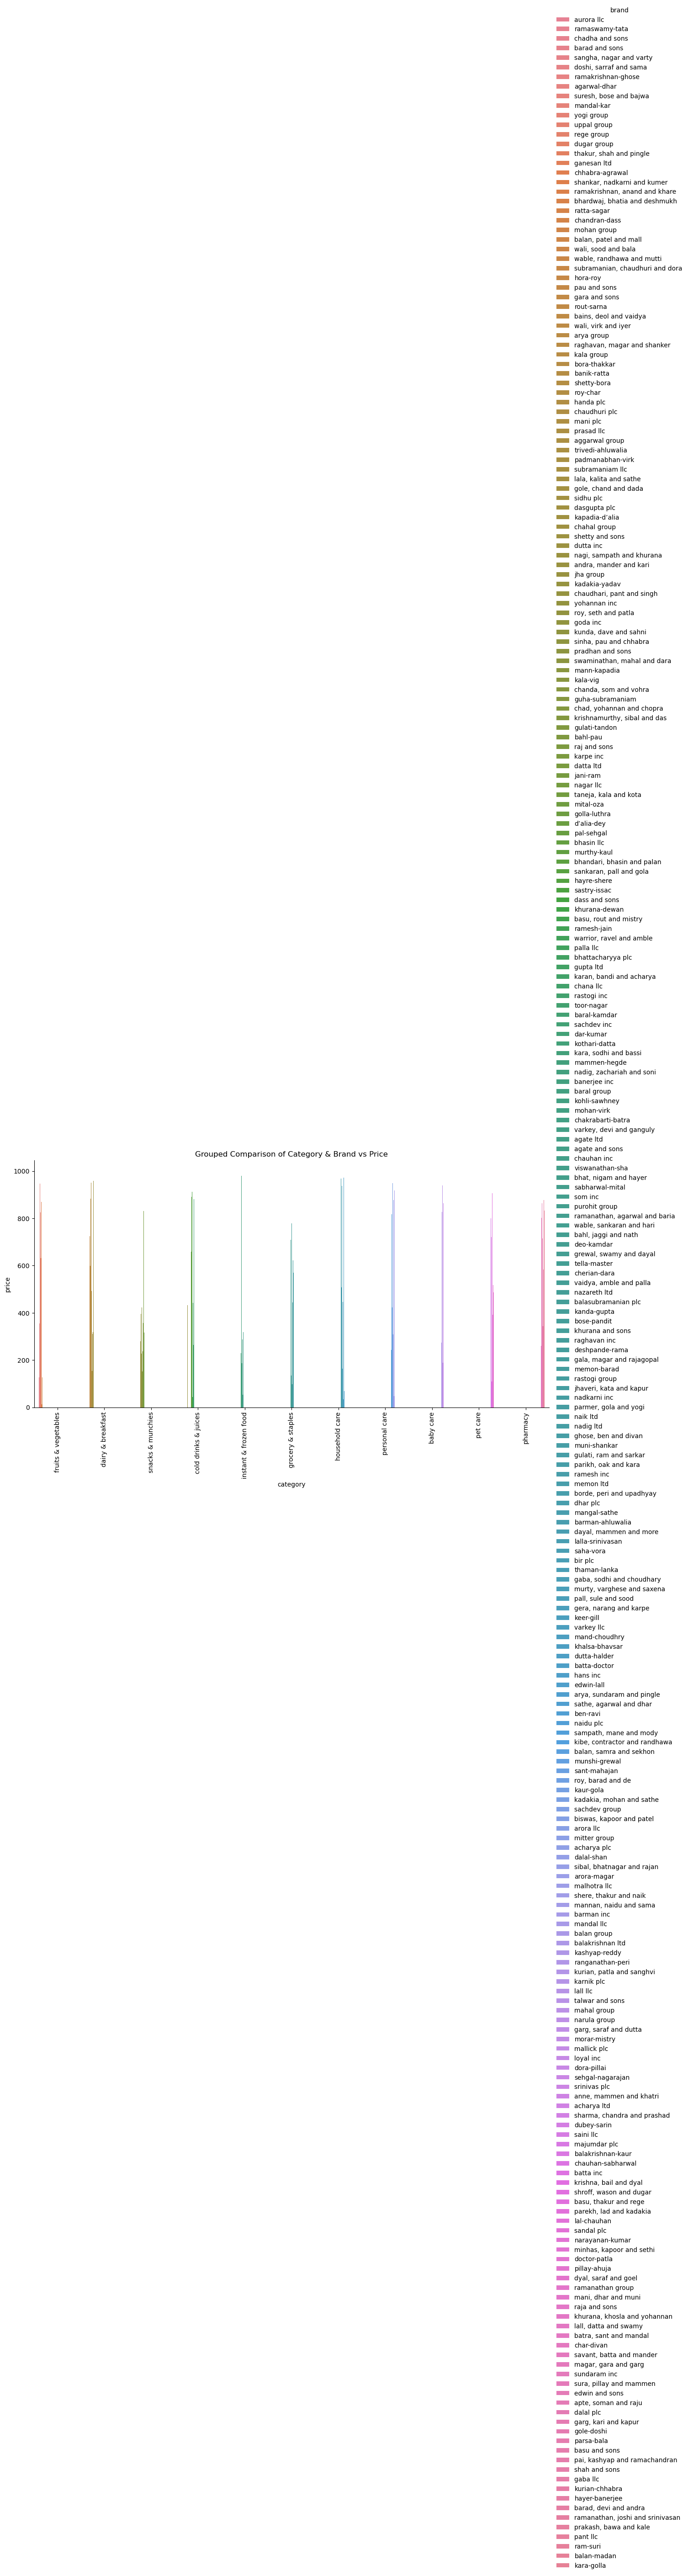

In [36]:
sns.catplot(x="category", y="price", hue="brand", kind="bar", data=df, height=6, aspect=2)
plt.title("Grouped Comparison of Category & Brand vs Price")
plt.xticks(rotation=90)
plt.show()


In [ ]:
df.to_csv(r"", index=False)
print("Cleaned dataset saved successfully!")
